In [1]:
from sherpa.astro.ui import *
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import glob
from astroquery.esa.xmm_newton import XMMNewton

 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)
 Cross Section Table set to vern:  Verner, Ferland, Korista, and Yakovlev 1996


In [2]:
observed=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/observed_full_info.csv')

In [19]:
interest=observed.loc[observed['# ObsID']=='3038'].head(1) #the one guy i downloaded
base='/Users/kciurleo/Downloads/0782940101PPS/pps/'
file='P0782940101PNS003SRSPEC000D.FTZ'

mdl = f'(xsphabs.abs1*xszphabs.abs2 * xszpowerlw.p1)'

nH=interest['galactic nH']
z=interest['Z']

clean()

#stats are chi squared with a 3 sigma error and units of eV
set_stat('chi2datavar')
set_conf_opt("sigma", 3)

#load in file, ignore outer limits, subtract the background, set model
load_pha(f'{base}{file}')
ignore()
notice(0.35,10)
subtract()
set_model(1,mdl)

#freeze galactic nH, set redshifts
abs1.nH = nH
freeze(abs1.nH)
p1.redshift = z
abs2.redshift = z
fit()

#Plotting
plt.figure()
plot_fit(xlog=True, ylog=True) 
plot_model_component(p1, overplot=True) 
plt.savefig(f'{base}/sherpa_fit_xmm.pdf')

#residuals
plt.figure()
plot_resid(xlog=True, ylog=True)
plt.savefig(f'{base}/sherpa_fit_resid_xmm.pdf')

#Get errors
conf()
res = get_conf_results()

#nH
int_nH = res.parvals[res.parnames.index('abs2.nH')]
int_nH_error_up = res.parmaxes[res.parnames.index('abs2.nH')]
int_nH_error_down = res.parmins[res.parnames.index('abs2.nH')]

#gamma
gamma = res.parvals[res.parnames.index('p1.PhoIndex')]
gamma_error_up = res.parmaxes[res.parnames.index('p1.PhoIndex')]
gamma_error_down = res.parmins[res.parnames.index('p1.PhoIndex')]

#get energy in keV
set_analysis('energy')
print('eflux')

#based on an example, set the errors as the upper errors
testy=sample_energy_flux(2, 10, scales=res.parmaxes)

#include the model to get unabsorbed flux; if we want absorbed, let it be none
funabs=calc_energy_flux(0.3, 7.5, model=p1)
f210=calc_energy_flux(2, 10, model=p1)

#erosita bands
fsoft=calc_energy_flux(0.2, 0.6, model=p1)
fmed=calc_energy_flux(0.6, 2.3, model=p1)
fhard=calc_energy_flux(2.3, 5, model=p1)
fsum=calc_energy_flux(0.2, 5, model=p1)


read ARF file /opt/pwdata/katie/csc2.1/9557/primary/reextract_pha.corr.arf
read RMF file /opt/pwdata/katie/csc2.1/9557/primary/reextract_pha.rmf
read ARF (background) file /opt/pwdata/katie/csc2.1/9557/primary/reextract_pha_bkg.arf
read RMF (background) file /opt/pwdata/katie/csc2.1/9557/primary/reextract_pha_bkg.rmf
read background file /opt/pwdata/katie/csc2.1/9557/primary/reextract_pha_bkg.pi
dataset 1: 0.0073:14.9504 Energy (keV) -> no data
dataset 1: no data -> 0.3358:10.001 Energy (keV)


/opt/anaconda3/envs/ciao-4.16/lib/python3.11/site-packages/sherpa/models/parameter.py:358: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  val = SherpaFloat(val)


FitErr: zeros found in uncertainties, consider using calculated uncertainties

In [4]:
hdr =fits.getheader(f'{base}P0782940101PNS003SRSPEC000D.FTZ',ext=1)
print(hdr['SRCNUM'])

13


In [474]:

interest=observed.loc[observed['# ObsID']=='3038'].head(1)
df.loc[df['# ObsID']=='3038'][['srcid', 'src_num', 'detid', 'observation_id', 'observation_oid', 'ra',
       'dec', 'duration', 'IAUNAME',]]

,srcid,src_num,detid,observation_id,observation_oid,ra,dec,duration,IAUNAME
97,2.078294e+14,13.0,1.078294e+14,782940101,67487.0,264.505411,58.503147,20040.0,4XMM J173801.2+583011


In [244]:
print(interest[['nH', 'nH error plus','gamma', 'gamma error minus', '0.3-7.5 flux','CXO name']])


        nH  nH error plus     gamma  gamma error minus  0.3-7.5 flux  \
6  0.00006       0.020492  1.716739           0.132433  2.391201e-13   

                CXO name  
6  2CXO J173801.1+583012  


In [251]:
df=pd.read_csv('/opt/pwdata/katie/xmm/xmm_download_output.csv')
df.columns

Index(['# ObsID', 'unabsorbed', 'model', 'Cstat', 'nH', 'nH error plus',
       'nH error minus', 'gamma', 'gamma error plus', 'gamma error minus',
       '0.3-7.5 flux', 'xflux error plus', 'xflux_error_minus', '2-10 flux',
       'flux210 error plus', 'flux210 error minus', 'Soft flux',
       'fluxsoft error plus', 'fluxsoft error minus', 'Medium flux',
       'fluxmed error plus', 'fluxmed error minus', 'Hard flux',
       'fluxhard error plus', 'fluxhard error minus', 'Sum flux',
       'fluxsum error plus', 'fluxsum error minus', 'Test Statistic', 'Ce',
       'Cv', 'CXO name', 'RA', 'Dec', 'Z', 'galactic nH', 'counts',
       'luminosity', 'luminosity error', 'Flux_OIII_5006',
       'Flux_OIII_5006_err', 'Fx/F[OIII]', 'Fx/F[OIII].1', 'compton thick',
       'srcid', 'src_num', 'detid', 'observation_id', 'observation_oid', 'ra',
       'dec', 'duration', 'IAUNAME', 'ra_2', 'dec_2', 'IAUstripped', 'MJD',
       'FIBERID', 'PLATE', 'CSC21P_name', 'CHANDRA_OBSID', ' OBSDATE', ' TIM

In [245]:
csc21=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/CSC2.1p_OIR_SDSSspecmatch.csv')

/var/folders/k6/tsv820sn5p716ph672hyrv8c004djp/T/ipykernel_8647/3415539890.py:1: DtypeWarning: Columns (57,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  csc21=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/CSC2.1p_OIR_SDSSspecmatch.csv')


In [24]:
os.chdir(base)
files = os.listdir()
print(len(files))
interesting_files=[]
for f in files:
    if "P0782940101PNS003" in f and 'FTZ' in f:
        interesting_files.append(f)
        print(f)
print(len(interesting_files))



863
P0782940101PNS003EXPMAP2000.FTZ
P0782940101PNS003IMAGE_3000.FTZ
P0782940101PNS003IMAGE_1000.FTZ
P0782940101PNS003SRCTSR802E.FTZ
P0782940101PNS003SRCTSR803C.FTZ
P0782940101PNS003SRCTSR8009.FTZ
P0782940101PNS003PIEVLI0000.FTZ
P0782940101PNS003SRCTSR8008.FTZ
P0782940101PNS003SRSPEC002E.FTZ
P0782940101PNS003IMAGE_5000.FTZ
P0782940101PNS003BGSPEC000D.FTZ
P0782940101PNS003BGSPEC0002.FTZ
P0782940101PNS003BGSPEC0016.FTZ
P0782940101PNS003BGSPEC0017.FTZ
P0782940101PNS003BGSPEC0003.FTZ
P0782940101PNS003BGSPEC000E.FTZ
P0782940101PNS003EXPMAP8000.FTZ
P0782940101PNS003SRSPEC0008.FTZ
P0782940101PNS003BGSPEC001C.FTZ
P0782940101PNS003BGSPEC0015.FTZ
P0782940101PNS003BGSPEC0001.FTZ
P0782940101PNS003EXPMAP4000.FTZ
P0782940101PNS003BGSPEC0014.FTZ
P0782940101PNS003BGSPEC000F.FTZ
P0782940101PNS003BGSPEC0028.FTZ
P0782940101PNS003SRSPEC0009.FTZ
P0782940101PNS003SRSPEC003C.FTZ
P0782940101PNS003SRCARF003C.FTZ
P0782940101PNS003SRCARF0009.FTZ
P0782940101PNS003BGSPEC0010.FTZ
P0782940101PNS003BGSPEC0004.FTZ
P078

In [241]:
sas_vers = fits.getheader(f'{base}P0782940101PNS003SRSPEC0001.FTZ',ext=0)['SASVERS']
print(sas_vers)
hdr =fits.getheader(f'{base}P0782940101PNS003SRSPEC0001.FTZ',ext=1)
data=fits.getdata(f'{base}P0782940101PNS003SRSPEC0001.FTZ',ext=1)
np.sum(data['COUNTS'])

xmmsas_20190401_1820-18.0.0


14417

In [109]:
testdict={
    '5.2.0': '2001-12-19_sas5.2.0/',
    '5.4.0': '2003-01-28_sas_5.4.0/',
    '6.0.0': '2004-07-30_sas6.0.0/',
    '6.1.0': '2004-12-03_sas6.1.0/',
    '6.5.0': '2005-12-14_sas6.5.0/',
    '7.1.0': '2007-07-17_sas7.1.0/',
    '8.0.0': '2008-07-23_sas8.0.0/',
    '9.0.0': '2009-06-15_sas9.0.0/',
    '10.0.0': '2010-04-23_sas10.0.0/',
    '11.0.0': '2011-02-23_sas11.0.0/',
    '12.0.1': '2012-06-25_sas12.0.1/',
    '13.0.0': '2013-05-01_sas13.0.0/',
    '13.5.0': '2013-12-09_sas13.5.0/',
    '14.0.0': '2014-11-13_sas14.0.0/',
    '15.0.0': '2016-02-01_sas15.0.0/',
    '16.0.0': '2017-01-12_sas16.0.0/',
    '17.0.0': '2018-06-22_sas17.0.0/',
    '18.0.0': '2019-07-31_sas18.0.0/',
    '19.0.0': '2020-10-28_sas19.0.0/',
    '20.0.0': '2021-12-09_sas20.0.0/'
}

In [122]:
newbase='/opt/pwdata/katie/xmm/'
fits.getheader(f'{newbase}0101640201/pps/P0101640201M1S002SRSPEC0005.FTZ',ext=1)['SRC_DEC']

0.502974967737503

In [ ]:
#THIS IS SETH's CODE    
srcmodel = 'xszpowerlw.p1'
    absmodel = 'xsphabs.abs1*xszphabs.abs2'
    mdl = f'({absmodel} * {srcmodel})'
    set_model(1,mdl)

    abs1.nH = nH
    freeze(abs1.nH)
    p1.redshift = z
    abs2.redshift = z


    #Use the fitter to stage the background so it can be fit by sherpa
    fitter = SingleFitter(1,f'{dir}/reextract_pha_bkg.pi',ChandraBackground)

    #cannot use the built in fitter staging method since that fucks up the energy units on the plots
    for stage in fitter.bm.stages:
        fitter.prepare_stage(stage=stage)

    #ignore low and high energy
    ignore()
    notice(0.3,7.5)
    ignore(bkg_id=1)
    notice(0.3,7.5,bkg_id=1)

    #perform the bkg fit
    fit_bkg()

    #freeze the background model parameters
    for p in get_bkg_model(1).pars:
        p.freeze()

    #set the full model
    set_full_model(1, get_bkg_model(1)*get_bkg_scale(1)+get_response(1)(mdl))

    #sherpa fit
    fit()



    #make a plot
    plot_fit_resid(xlog=True,ylog=True)
    plt.title(None)
    plt.savefig(f'{dir}/sherpa_data_fit.pdf')
    plt.close()

In [103]:
df[['srcid', 'detid', 'observation_id', 'observation_oid']].astype(int)

,srcid,detid,observation_id,observation_oid
0,202021902010010,102021902010010,202190201,57587
1,202044101010008,102044101010008,204410101,57826
2,201016402010014,101016402010014,101640201,54912
3,201016402010014,101016402010014,101640201,54912
4,208434401010012,108434401010012,843440101,70607
...,...,...,...,...
151,207829401010012,107829401010012,782940101,67487
152,200930302010011,100930302010011,93030201,54723
153,200423413010006,108273504010010,827350401,71125
154,200423413010006,100423413010006,42341301,54301


In [252]:
#let's figure out how many "good" chandra objects we have
final_min_abs = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_min_abs_full.csv')
final_full = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_full.csv')

In [260]:
len(final_full['CXO name'].unique())

564

In [291]:
len(final_min_abs['CXO name'].unique())

78

In [324]:
#Find all the guys for which all the chandra observations are less than 100 or 300 counts
low_count_names=[]
high_count_names=[]
for i in range(len(final_min_abs['CXO name'].unique())):
    name=final_min_abs['CXO name'].unique()[i]

    df=final_full.loc[final_full['CXO name']==name]
    if (df['counts'] < 300).all():
        low_count_names.append(name)
    else:
        high_count_names.append(name)

low_count = final_min_abs.loc[final_min_abs['CXO name'].isin(low_count_names)]
high_count = final_min_abs.loc[final_min_abs['CXO name'].isin(high_count_names)]


In [323]:
high_count['MJD']


1     52797
7     52797
15    52797
16    52797
30    52797
31    52797
56    52797
57    52797
64    52797
66    52797
67    52797
68    52797
69    52797
70    52797
71    52797
72    52797
73    52797
74    52797
75    52797
92    52797
93    52797
Name: MJD, dtype: int64

In [328]:
final_full.loc[final_full['CXO name']=='2CXO J142916.8+335641']

,# ObsID,unabsorbed,model,Cstat,nH,nH error plus,nH error minus,gamma,gamma error plus,gamma error minus,...,Z,galactic nH,counts,luminosity,luminosity error,Flux_OIII_5006,Flux_OIII_5006_err,Fx/F[OIII],Fx/F[OIII].1,compton thick
701,4222,False,res,614.7384725253677,1.1946943249848343,0.5097766064564085,-0.5097766064564085,1.9,NaN,NaN,...,0.130187,0.0108,84,1.2158074508954104e+43,2.1342420699844385e+42,9.884091,15.62492,2712.89707659167,4314.94869789026,True


In [273]:
seyferts=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/obsids_seyferts.csv', low_memory=False)

In [280]:
print(len(seyferts['CSC21P_name'].unique()))

717


In [283]:
low_count_names_whole_sey=[]
for i in range(len(seyferts['CSC21P_name'].unique())):
    name=seyferts['CSC21P_name'].unique()[i]

    df=final_full.loc[final_full['CXO name']==name]
    if (df['counts'] < 300).all():
        low_count_names_whole_sey.append(name)

low_count_all_sey = final_full.loc[final_full['CXO name'].isin(low_count_names_whole_sey)]

In [284]:
len(low_count_all_sey['CXO name'].unique())

512

In [288]:
((717-512)/717)/((78-69)/78)

2.477917247791725

In [338]:
observed_all=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/ALL_observed_full_info.csv')

In [344]:
interest=observed_all.loc[observed_all['# ObsID']=='20889']
interest[['RA', 'Dec']]
interest["observation_id"].iloc[0]

,RA,Dec
4,121.395863,24.163962


In [364]:
base=f'/Users/kciurleo/Downloads/0{interest["observation_id"].iloc[0]}/pps/'

filelist=glob.glob(f'{base}/*SRSPEC*')
for i in filelist:
    try:
        print(i)
        hdr =fits.getheader(i,ext=1)
        print(hdr['SRC_RA'], hdr['SRC_DEC'])
    except:
        continue

/Users/kciurleo/Downloads/0203280201/pps/P0203280201R1S004SRSPEC2003.FTZ
121.231651306152 24.1906509399414
/Users/kciurleo/Downloads/0203280201/pps/P0203280201M2S002SRSPEC0001.PNG
/Users/kciurleo/Downloads/0203280201/pps/P0203280201R2S005SRSPEC1003.FTZ
121.231651306152 24.1906509399414
/Users/kciurleo/Downloads/0203280201/pps/P0203280201R2S005SRSPEC0003.PDF
/Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003SRSPEC0004.PNG
/Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003SRSPEC0002.PNG
/Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003SRSPEC0003.PNG
/Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003SRSPEC0001.PNG
/Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003SRSPEC0001.FTZ
121.231746201438 24.1906220110476
/Users/kciurleo/Downloads/0203280201/pps/P0203280201R2S005SRSPEC2003.FTZ
121.231651306152 24.1906509399414
/Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003SRSPEC0003.FTZ
121.396133657603 24.1644081109002
/Users/kciurleo/Downloads/0

In [367]:
correct_file='/Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003SRSPEC0003.FTZ'
sas_vers = fits.getheader(correct_file,ext=0)['SASVERS']
print(sas_vers)

xmmsas_20190401_1820-18.0.0


read ARF file /Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003SRCARF0003.FTZ
read RMF file /Users/kciurleo/Downloads/0203280201/pps/epn_e1_ff20_sdY9.rmf
read background file /Users/kciurleo/Downloads/0203280201/pps/P0203280201PNS003BGSPEC0003.FTZ
dataset 1: 0:20.48 Energy (keV) -> no data
dataset 1: no data -> 0.324919:20.48 Energy (keV)


/opt/anaconda3/envs/ciao-4.16/lib/python3.11/site-packages/sherpa/models/parameter.py:358: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  val = SherpaFloat(val)


Dataset               = 1
Method                = levmar
Statistic             = chi2datavar
Initial fit statistic = 6.05849e+11
Final fit statistic   = 53.5334 at function evaluation 276
Data points           = 9
Degrees of freedom    = 6
Probability [Q-value] = 9.16102e-10
Reduced statistic     = 8.92224
Change in statistic   = 6.05849e+11
   abs2.nH        0            +/- 0.409439    
   p1.PhoIndex    -0.208381    +/- 0.241195    
   p1.norm        2.08253e-06  +/- 9.06314e-07 


EstErr: reduced statistic larger than 3

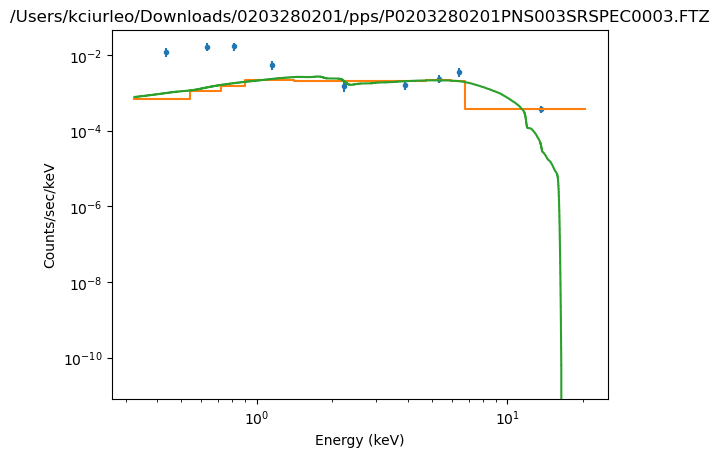

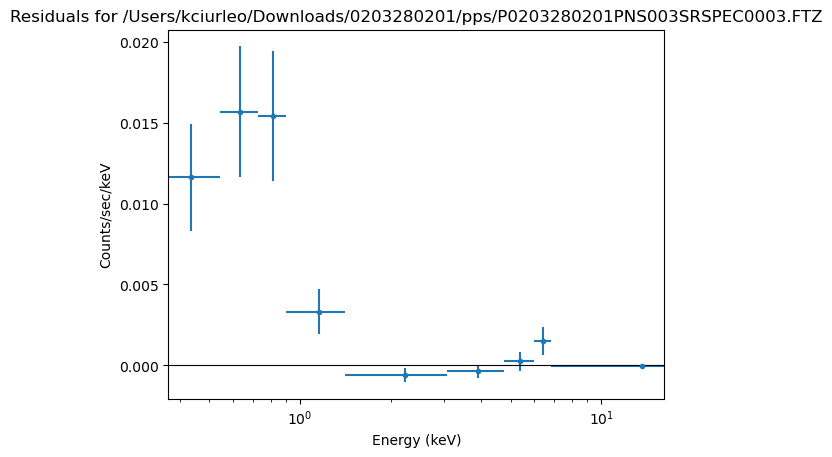

In [368]:
mdl = f'(xsphabs.abs1*xszphabs.abs2 * xszpowerlw.p1)'

nH=interest['galactic nH']
z=interest['Z']

clean()

#stats are chi squared with a 3 sigma error and units of eV
set_stat('chi2datavar')
set_conf_opt("sigma", 3)

#load in file, ignore outer limits, subtract the background, set model
load_pha(correct_file)
ignore()
notice(0.35,10)
subtract()
set_model(1,mdl)

#freeze galactic nH, set redshifts
abs1.nH = nH
freeze(abs1.nH)
p1.redshift = z
abs2.redshift = z
fit()

#Plotting
plt.figure()
plot_fit(xlog=True, ylog=True) 
plot_model_component(p1, overplot=True) 
plt.savefig(f'{base}/sherpa_fit_xmm.pdf')

#residuals
plt.figure()
plot_resid(xlog=True, ylog=True)
plt.savefig(f'{base}/sherpa_fit_resid_xmm.pdf')

#Get errors
conf()
res = get_conf_results()

#nH
int_nH = res.parvals[res.parnames.index('abs2.nH')]
int_nH_error_up = res.parmaxes[res.parnames.index('abs2.nH')]
int_nH_error_down = res.parmins[res.parnames.index('abs2.nH')]

#gamma
gamma = res.parvals[res.parnames.index('p1.PhoIndex')]
gamma_error_up = res.parmaxes[res.parnames.index('p1.PhoIndex')]
gamma_error_down = res.parmins[res.parnames.index('p1.PhoIndex')]

#get energy in keV
set_analysis('energy')
print('eflux')

#based on an example, set the errors as the upper errors
testy=sample_energy_flux(2, 10, scales=res.parmaxes)

#include the model to get unabsorbed flux; if we want absorbed, let it be none
funabs=calc_energy_flux(0.3, 7.5, model=p1)
f210=calc_energy_flux(2, 10, model=p1)

#erosita bands
fsoft=calc_energy_flux(0.2, 0.6, model=p1)
fmed=calc_energy_flux(0.6, 2.3, model=p1)
fhard=calc_energy_flux(2.3, 5, model=p1)
fsum=calc_energy_flux(0.2, 5, model=p1)

In [388]:
#okay take 2
interest=observed_all.loc[observed_all['CXO name']=='2CXO J120746.1+430736']
print(interest[['RA', 'Dec']])
print(interest['observation_id'])

            RA        Dec
30  181.942147  43.126871
31  181.942147  43.126871
30    655800101
31    655800501
Name: observation_id, dtype: int64


In [383]:
base=f'/Users/kciurleo/Downloads/0{interest["observation_id"].iloc[1]}/pps/'

filelist=glob.glob(f'{base}/*SRSPEC*')
for i in filelist:
    try:
        hdr =fits.getheader(i,ext=1)
        print(i)
        
        print(hdr['SRC_RA'], hdr['SRC_DEC'])
    except:
        continue

/Users/kciurleo/Downloads/0655800501/pps/P0655800501R2S005SRSPEC1004.FTZ
182.069152832031 43.0526695251465
/Users/kciurleo/Downloads/0655800501/pps/P0655800501R1S004SRSPEC2004.FTZ
182.069152832031 43.0526695251465
/Users/kciurleo/Downloads/0655800501/pps/P0655800501PNS003SRSPEC0009.FTZ
182.031356414449 43.0486782733477
/Users/kciurleo/Downloads/0655800501/pps/P0655800501PNS003SRSPEC0026.FTZ
181.769015355724 43.0639459679602
/Users/kciurleo/Downloads/0655800501/pps/P0655800501M1S001SRSPEC0003.FTZ
182.067249104548 42.979689972923
/Users/kciurleo/Downloads/0655800501/pps/P0655800501M1S001SRSPEC0002.FTZ
182.069108600903 43.0527087983277
/Users/kciurleo/Downloads/0655800501/pps/P0655800501PNS003SRSPEC0001.FTZ
181.763244607216 43.0655408507636
/Users/kciurleo/Downloads/0655800501/pps/P0655800501PNS003SRSPEC0003.FTZ
182.067249104548 42.979689972923
/Users/kciurleo/Downloads/0655800501/pps/P0655800501M1S001SRSPEC0001.FTZ
181.763244607216 43.0655408507636
/Users/kciurleo/Downloads/0655800501/pp

In [384]:
correct_file='/Users/kciurleo/Downloads/0655800501/pps/P0655800501PNS003SRSPEC0004.FTZ'
sas_vers = fits.getheader(correct_file,ext=0)['SASVERS']
print(sas_vers)

xmmsas_20190401_1820-18.0.0


read ARF file /Users/kciurleo/Downloads/0655800501/pps/P0655800501PNS003SRCARF0004.FTZ
read RMF file /Users/kciurleo/Downloads/0655800501/pps/epn_e3_ff20_sdY9.rmf
read background file /Users/kciurleo/Downloads/0655800501/pps/P0655800501PNS003BGSPEC0004.FTZ
dataset 1: 0:20.48 Energy (keV) -> no data
dataset 1: no data -> 0.324919:10.28 Energy (keV)
Dataset               = 1
Method                = levmar
Statistic             = chi2datavar
Initial fit statistic = 3.36626e+11
Final fit statistic   = 71.7944 at function evaluation 168
Data points           = 20
Degrees of freedom    = 17
Probability [Q-value] = 1.05653e-08
Reduced statistic     = 4.2232
Change in statistic   = 3.36626e+11
   abs2.nH        54.4402      +/- 24.9327     
   p1.PhoIndex    1.76637      +/- 1.18733     
   p1.norm        0.000435668  +/- 0.00117419  


EstErr: reduced statistic larger than 3

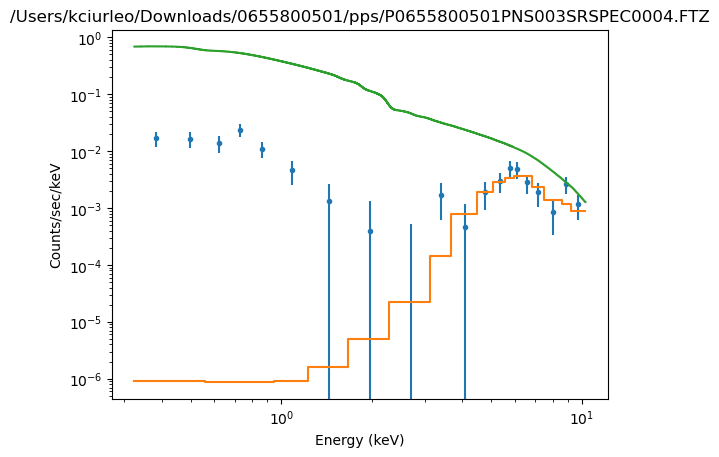

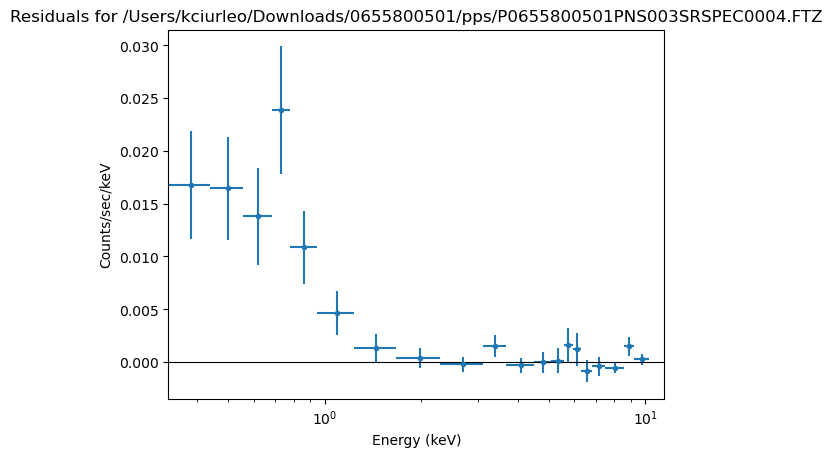

In [389]:
mdl = f'(xsphabs.abs1*xszphabs.abs2 * xszpowerlw.p1)'
interest=interest.iloc[0]
nH=interest['galactic nH']
z=interest['Z']

clean()

#stats are chi squared with a 3 sigma error and units of eV
set_stat('chi2datavar')
set_conf_opt("sigma", 3)

#load in file, ignore outer limits, subtract the background, set model
load_pha(correct_file)
ignore()
notice(0.35,10)
subtract()
set_model(1,mdl)

#freeze galactic nH, set redshifts
abs1.nH = nH
freeze(abs1.nH)
p1.redshift = z
abs2.redshift = z
fit()

#Plotting
plt.figure()
plot_fit(xlog=True, ylog=True) 
plot_model_component(p1, overplot=True) 
plt.savefig(f'{base}/sherpa_fit_xmm.pdf')

#residuals
plt.figure()
plot_resid(xlog=True, ylog=True)
plt.savefig(f'{base}/sherpa_fit_resid_xmm.pdf')

#Get errors
conf()
res = get_conf_results()

#nH
int_nH = res.parvals[res.parnames.index('abs2.nH')]
int_nH_error_up = res.parmaxes[res.parnames.index('abs2.nH')]
int_nH_error_down = res.parmins[res.parnames.index('abs2.nH')]

#gamma
gamma = res.parvals[res.parnames.index('p1.PhoIndex')]
gamma_error_up = res.parmaxes[res.parnames.index('p1.PhoIndex')]
gamma_error_down = res.parmins[res.parnames.index('p1.PhoIndex')]

#get energy in keV
set_analysis('energy')
print('eflux')

#based on an example, set the errors as the upper errors
testy=sample_energy_flux(2, 10, scales=res.parmaxes)

#include the model to get unabsorbed flux; if we want absorbed, let it be none
funabs=calc_energy_flux(0.3, 7.5, model=p1)
f210=calc_energy_flux(2, 10, model=p1)

#erosita bands
fsoft=calc_energy_flux(0.2, 0.6, model=p1)
fmed=calc_energy_flux(0.6, 2.3, model=p1)
fhard=calc_energy_flux(2.3, 5, model=p1)
fsum=calc_energy_flux(0.2, 5, model=p1)

In [394]:
#third guy
interest=observed_all.loc[observed_all['CXO name']=='2CXO J134736.4+173404'].drop_duplicates(subset=['observation_id'])
print(interest[['RA', 'Dec']])
print()
print(os.getcwd())

            RA       Dec
44  206.901667  17.56794
45  206.901667  17.56794
46  206.901667  17.56794
47  206.901667  17.56794
48  206.901667  17.56794
49  206.901667  17.56794
50  206.901667  17.56794
51  206.901667  17.56794
52  206.901667  17.56794

/Users/kciurleo/Downloads/0782940101PPS/pps


In [397]:
os.chdir('/Users/kciurleo/Downloads/')
for obsid in interest['observation_id']:
    print(f'downloading {obsid}')
    try:
        XMMNewton.download_data(f'0{obsid}', level='PPS', extension='FTZ')
    except:
        continue

downloading 671150701
downloading 651140201
downloading 651140401
downloading 671150601
downloading 671150501
downloading 651140501
downloading 651140301
downloading 144570101
downloading 671150801


In [408]:
#fourth guy
interest=observed_all.loc[observed_all['CXO name']=='2CXO J140052.5-014511'].drop_duplicates(subset=['observation_id'])
print(interest[['RA', 'Dec']])
print(interest['observation_id'])

            RA       Dec
53  210.219033 -1.753092
54  210.219033 -1.753092
55  210.219033 -1.753092
53    200430901
54    505930101
55    505930401
Name: observation_id, dtype: int64


In [400]:
for obsid in interest['observation_id']:
    print(f'downloading {obsid}')
    try:
        XMMNewton.download_data(f'0{obsid}', level='PPS', extension='FTZ')
    except:
        print('failed')
        continue

downloading 200430901
downloading 505930101
downloading 505930401


In [403]:
base=f'/Users/kciurleo/Downloads/0{interest["observation_id"].iloc[1]}/pps/'

filelist=glob.glob(f'{base}/*SRSPEC*')
for i in filelist:
    try:
        hdr =fits.getheader(i,ext=1)
        print(i)
        
        print(hdr['SRC_RA'], hdr['SRC_DEC'])
    except:
        continue

/Users/kciurleo/Downloads/0505930101/pps/P0505930101PNS003SRSPEC0008.FTZ
210.219921253281 -1.81237057707908
/Users/kciurleo/Downloads/0505930101/pps/P0505930101PNS003SRSPEC0009.FTZ
210.133749510775 -1.85219854249522
/Users/kciurleo/Downloads/0505930101/pps/P0505930101PNS003SRSPEC0023.FTZ
210.07308483121 -1.81679938577355
/Users/kciurleo/Downloads/0505930101/pps/P0505930101R1S004SRSPEC2003.FTZ
210.218719482422 -1.75306451320648
/Users/kciurleo/Downloads/0505930101/pps/P0505930101R2S005SRSPEC1003.FTZ
210.218719482422 -1.75306451320648
/Users/kciurleo/Downloads/0505930101/pps/P0505930101M2S002SRSPEC0001.FTZ
210.218715182555 -1.75305898769268
/Users/kciurleo/Downloads/0505930101/pps/P0505930101M1S001SRSPEC0002.FTZ
210.137029621667 -1.72792106847984
/Users/kciurleo/Downloads/0505930101/pps/P0505930101PNS003SRSPEC0001.FTZ
210.218715182555 -1.75305898769268
/Users/kciurleo/Downloads/0505930101/pps/P0505930101PNS003SRSPEC0015.FTZ
210.34431509755 -1.75303644849202
/Users/kciurleo/Downloads/0505

In [404]:
correct_file='/Users/kciurleo/Downloads/0505930101/pps/P0505930101PNS003SRSPEC0001.FTZ'
sas_vers = fits.getheader(correct_file,ext=0)['SASVERS']
print(sas_vers)

xmmsas_20190401_1820-18.0.0


read ARF file /Users/kciurleo/Downloads/0505930101/pps/P0505930101PNS003SRCARF0001.FTZ
read RMF file /Users/kciurleo/Downloads/0505930101/pps/epn_e2_ff20_sdY9.rmf
read background file /Users/kciurleo/Downloads/0505930101/pps/P0505930101PNS003BGSPEC0001.FTZ
dataset 1: 0:20.48 Energy (keV) -> no data
dataset 1: no data -> 0.324919:10.175 Energy (keV)
Dataset               = 1
Method                = levmar
Statistic             = chi2datavar
Initial fit statistic = 1.17487e+12
Final fit statistic   = 88.5146 at function evaluation 311
Data points           = 99
Degrees of freedom    = 96
Probability [Q-value] = 0.693737
Reduced statistic     = 0.922027
Change in statistic   = 1.17487e+12
   abs2.nH        0.0015881    +/- 0.0286771   
   p1.PhoIndex    2.55627      +/- 0.0497688   
   p1.norm        9.26488e-05  +/- 2.36034e-06 
abs2.nH lower bound:	-----
abs2.nH upper bound:	0.0231802
p1.PhoIndex lower bound:	-0.12517
p1.PhoIndex upper bound:	0.138706
p1.norm lower bound:	-4.0688e-06
p1

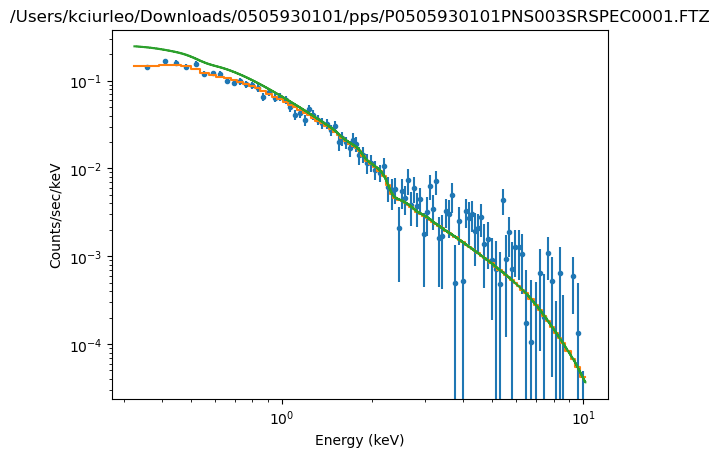

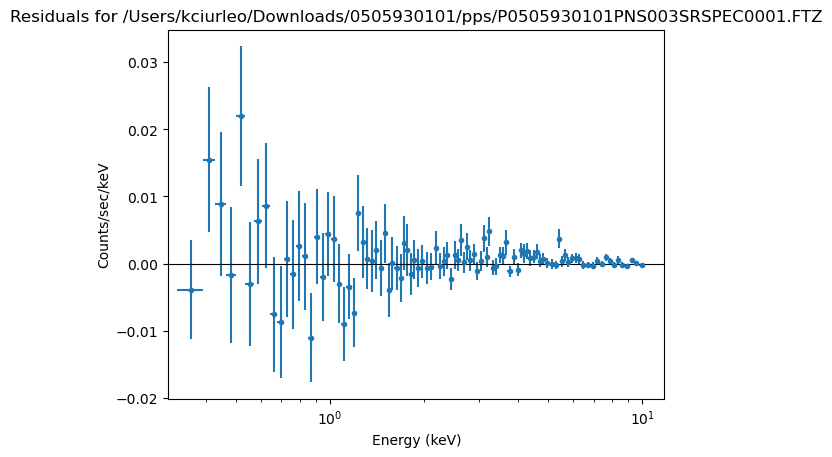

In [409]:
mdl = f'(xsphabs.abs1*xszphabs.abs2 * xszpowerlw.p1)'

nH=interest['galactic nH'].iloc[0]
z=interest['Z'].iloc[0]

clean()

#stats are chi squared with a 3 sigma error and units of eV
set_stat('chi2datavar')
set_conf_opt("sigma", 3)

#load in file, ignore outer limits, subtract the background, set model
load_pha(correct_file)
ignore()
notice(0.35,10)
subtract()
set_model(1,mdl)

#freeze galactic nH, set redshifts
abs1.nH = nH
freeze(abs1.nH)
p1.redshift = z
abs2.redshift = z
fit()

#Plotting
plt.figure()
plot_fit(xlog=True, ylog=True) 
plot_model_component(p1, overplot=True) 
plt.savefig(f'{base}/sherpa_fit_xmm.pdf')

#residuals
plt.figure()
plot_resid(xlog=True, ylog=True)
plt.savefig(f'{base}/sherpa_fit_resid_xmm.pdf')

#Get errors
conf()
res = get_conf_results()

#nH
int_nH = res.parvals[res.parnames.index('abs2.nH')]
int_nH_error_up = res.parmaxes[res.parnames.index('abs2.nH')]
int_nH_error_down = res.parmins[res.parnames.index('abs2.nH')]

#gamma
gamma = res.parvals[res.parnames.index('p1.PhoIndex')]
gamma_error_up = res.parmaxes[res.parnames.index('p1.PhoIndex')]
gamma_error_down = res.parmins[res.parnames.index('p1.PhoIndex')]

#get energy in keV
set_analysis('energy')
print('eflux')

#based on an example, set the errors as the upper errors
testy=sample_energy_flux(2, 10, scales=res.parmaxes)

#include the model to get unabsorbed flux; if we want absorbed, let it be none
funabs=calc_energy_flux(0.3, 7.5, model=p1)
f210=calc_energy_flux(2, 10, model=p1)

#erosita bands
fsoft=calc_energy_flux(0.2, 0.6, model=p1)
fmed=calc_energy_flux(0.6, 2.3, model=p1)
fhard=calc_energy_flux(2.3, 5, model=p1)
fsum=calc_energy_flux(0.2, 5, model=p1)

In [426]:
final_full.loc[final_full["CXO name"]=="2CXO J142916.8+335641"]

,# ObsID,unabsorbed,model,Cstat,nH,nH error plus,nH error minus,gamma,gamma error plus,gamma error minus,...,Z,galactic nH,counts,luminosity,luminosity error,Flux_OIII_5006,Flux_OIII_5006_err,Fx/F[OIII],Fx/F[OIII].1,compton thick
701,4222,False,res,614.7384725253677,1.1946943249848343,0.5097766064564085,-0.5097766064564085,1.9,NaN,NaN,...,0.130187,0.0108,84,1.2158074508954104e+43,2.1342420699844385e+42,9.884091,15.62492,2712.89707659167,4314.94869789026,True


In [425]:
final_min_abs.loc[final_min_abs["CXO name"]=="2CXO J142916.8+335641"]

,# ObsID,unabsorbed,model,Cstat,nH,nH error plus,nH error minus,gamma,gamma error plus,gamma error minus,...,Z,galactic nH,counts,luminosity,luminosity error,Flux_OIII_5006,Flux_OIII_5006_err,Fx/F[OIII],Fx/F[OIII].1,compton thick


In [455]:
csc21.loc[csc21["CSC21P_name"]=="2CXO J140052.5-014511"][['MJD','FIBERID','PLATE']]

,MJD,FIBERID,PLATE
225177,52443.0,429.0,915.0


In [452]:
len(final_full.loc[(pd.to_numeric(final_full['nH'], errors='coerce') > .05) & (pd.to_numeric(final_full['nH'], errors='coerce') <= .2)]['CXO name'].unique())

37

In [446]:
len(final_full.loc[final_full['unabsorbed']==True]['CXO name'].unique())

105

In [454]:
final_full.loc[final_full['# ObsID']=='9557']['CXO name']

616    2CXO J140052.5-014511
Name: CXO name, dtype: object

In [448]:
len(final_min_abs['CXO name'].unique())

78